# Pandas

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('./HW_ML_01_02_BlackFriday.csv')

In [3]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [5]:
data.shape

(550068, 12)

**Задание 1** (0.5 балла за каждый пункт)

1. Сколько всего уникальных покупателей?
2. Сколько женщин из города категории A старше 36 лет?
3. Сколько покупателей от 26 до 35, потративших (столбец Purchase) больше 10000 у.е. и проживающих в городе категории В?
4. Какая доля от всех покупок приходится на город категории А?


In [6]:
data['User_ID'].nunique()

5891

In [7]:
data[(data['Age'] >= '36-45') & (data['City_Category'] == 'A') & (data['Gender'] == 'F')].shape[0]

10497

In [8]:
data[(data['Age'] == '26-35') & (data['Purchase'] > 10000) & (data['City_Category'] == 'B')].shape[0]

31063

In [9]:
data[data['City_Category'] == 'A'].shape[0]/data.shape[0]

0.26854861580750017

**Задание 2** (1 балл за каждый пункт)

1. Какая средняя сумма всех покупок на одного покупателя?
2. Какое среднее число покупок делает покупатель каждого пола?
2. Какая возрастная категория самая прибыльная?

In [10]:
data['Purchase'].mean()

9263.968712959126

In [11]:
data.groupby("Gender")['Gender'].count()

Gender
F    135809
M    414259
Name: Gender, dtype: int64

In [12]:
data.groupby('Age')['Purchase'].sum().sort_index(axis=0, ascending=False).idxmax()

'26-35'

**Задание 2** (1 балл)

Создайте категориальную фичу Purchase_Сat с помощью колонки Purchase:

1. Purchase_cat = '<5000' , если Purchase < 5000

2. Purchase_cat = '5000 - 8000' , если 5000 <= Purchase < 8000

2. Purchase_cat = '>=8000' , если 8000 <= Purchase

In [13]:
data['Purchase_Cat'] = data['Purchase'].apply(lambda x: '<5000' if x < 5000 else '5000 - 8000' if 5000 <= x < 8000 else '>=8000').astype('category')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Cat
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,>=8000
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,>=8000
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422,<5000
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057,<5000
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969,5000 - 8000


**Задание 3** (1 балл)

Создайте таблицу shipping:

| Purchase_Cat | Shipping_Cost_Raw |   |   |   |
|--------------|-------------------|---|---|---|
| <5000        | 100               |   |   |   |
| 5000 - 8000  | 50                |   |   |   |
| >=8000       | 0                 |   |   |   |

In [14]:
shipping = pd.DataFrame([['<5000', 100], ['5000 - 8000', 50], ['>=8000', 0]], columns=['Purchase_Cat', 'Shipping_Cost_Raw'])
shipping['Purchase_Cat'] = shipping['Purchase_Cat'].astype('category')
shipping

,Purchase_Cat,Shipping_Cost_Raw
0,<5000,100
1,5000 - 8000,50
2,>=8000,0


**Задание 4** (1 балл)


Добавьте в таблицу data колонку Shipping_Cost_Raw , используя таблицу shipping, созданную выше.

In [15]:
# merge

In [16]:
data = data.merge(shipping, on=['Purchase_Cat'], how='inner')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Cat,Shipping_Cost_Raw
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,>=8000,0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,>=8000,0
2,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227,>=8000,0
3,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,>=8000,0
4,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854,>=8000,0


**Задание 5** (2 балла)

Добавьте в таблицу data колонку Shipping_Cost, значения для которой определяются следующей формулой:

Shipping_cost = Shipping_Cost_raw * Cost_Coeff

Значения Cost_Coeff, определяются в соответствии с колонкой City_Category:

| City_Category | Cost_Coeff |   |   |   |
|---------------|------------|---|---|---|
| A             | 1          |   |   |   |
| B             | 1.2        |   |   |   |
| C             | 1.4        |   |   |   |

In [17]:
data['Cost_Coeff'] = data['City_Category'].apply(lambda x: 1 if x == 'A' else 1.2 if x == 'B' else 1.4)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Cat,Shipping_Cost_Raw,Cost_Coeff
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,>=8000,0,1.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,>=8000,0,1.0
2,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227,>=8000,0,1.0
3,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,>=8000,0,1.2
4,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854,>=8000,0,1.2


In [18]:
data['Shipping_cost'] = data['Shipping_Cost_Raw'] * data['Cost_Coeff']
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Cat,Shipping_Cost_Raw,Cost_Coeff,Shipping_cost
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370,>=8000,0,1.0,0.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200,>=8000,0,1.0,0.0
2,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227,>=8000,0,1.0,0.0
3,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215,>=8000,0,1.2,0.0
4,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854,>=8000,0,1.2,0.0


**Задание 6** (1 балл)

Чему равна сумма доставки (колонка Shipping_Cost) для всех покупателей?

In [19]:
data['Shipping_cost'].sum()

21768760.0

**Задание 7** (3 балла)

Из таблицы data создайте новую таблицу со статистикой по колонке Age. В этой таблице для каждого уникального значения Age должны быть:

* число покупателей (количество уникальных значений по полю User_ID), 
* средняя стоимость покупки (среднее по полю Purchase), 
* максимальная сумма покупки (максимальное значение поля Purchase), 
* минимальная сумма покупки (минимальное значение поля Purchase),
* средняя стоимость доставки (среднее значение поля Shipping_Cost).


In [20]:
# groupby 
# agg

In [21]:
data_stat = data.groupby('Age').agg({'User_ID': pd.Series.nunique,'Purchase': ['mean', 'max', 'min'],'Shipping_cost': 'mean'})
data_stat

User_ID     Purchase            Shipping_cost
      nunique         mean    max min          mean
Age                                                
0-17      218  8933.464640  23955  12     44.807310
18-25    1069  9169.663606  23958  12     40.581979
26-35    2053  9252.690633  23961  12     39.109601
36-45    1167  9331.350695  23960  12     39.163826
46-50     531  9208.625697  23960  12     40.459071
51-55     481  9534.808031  23960  12     37.839017
55+       372  9336.280459  23960  12     39.310361

**Задание 8** (2 балла)

1. Отсортируйте таблицу data по колонке Сity_Category(по убыванию), по колонке Shipping_Cost (по возрастанию при равенстве Сity_Category) и по колонке Purchase(по возрастанию при равенстве Shipping_Cost)

2. Перезапишите индексы в порядке убывания.

In [22]:
data_sorted = data.sort_values(['City_Category', 'Shipping_cost', 'Purchase'], ascending=[False, True, True]).reset_index(drop=True)
data_sorted.index = range(len(data_sorted)-1, -1, -1)
data_sorted

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Purchase_Cat,Shipping_Cost_Raw,Cost_Coeff,Shipping_cost
550067,1004180,P00276642,M,55+,13,C,1,1,8,11.0,NaN,8000,>=8000,0,1.4,0.0
550066,1001420,P00274942,M,18-25,4,C,3,0,8,NaN,NaN,8000,>=8000,0,1.4,0.0
550065,1001938,P00053342,F,26-35,2,C,1,1,1,2.0,4.0,8000,>=8000,0,1.4,0.0
550064,1003407,P00317442,F,46-50,5,C,1,0,1,8.0,NaN,8000,>=8000,0,1.4,0.0
550063,1003658,P00084842,F,26-35,7,C,4+,0,8,16.0,NaN,8000,>=8000,0,1.4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,1001069,P00050642,M,26-35,20,A,4+,0,15,16.0,NaN,4949,<5000,100,1.0,100.0
3,1005686,P00314642,M,55+,16,A,1,1,15,NaN,NaN,4952,<5000,100,1.0,100.0
2,1000620,P00312742,M,18-25,0,A,3,0,15,NaN,NaN,4966,<5000,100,1.0,100.0
1,1000070,P00312742,M,18-25,4,A,2,0,15,NaN,NaN,4976,<5000,100,1.0,100.0


In [23]:
assert (data_sorted.index == range(data_sorted.shape[0]-1,-1, -1)).all()
assert data.shape == data_sorted.shape

# Matplotlib

In [24]:
import matplotlib.pyplot as plt

**Задание 9** (1 балл)


Постройте гистограммы для колонок Purchase и Shipping_Cost таблицы data

<AxesSubplot:>

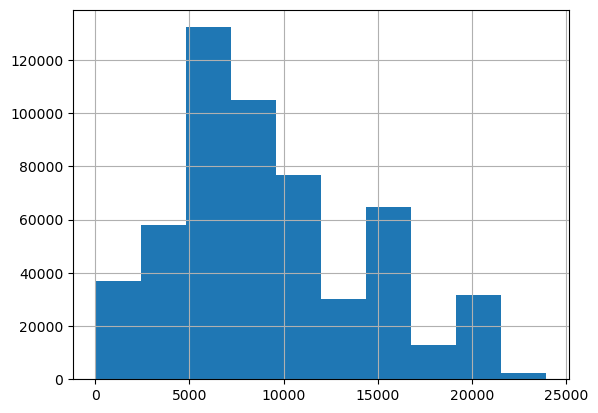

In [25]:
data['Purchase'].hist()

<AxesSubplot:>

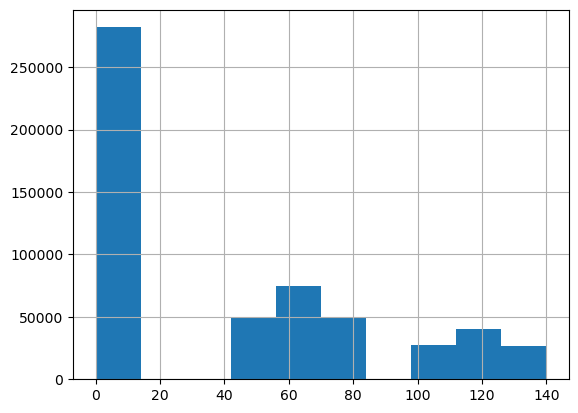

In [26]:
data['Shipping_cost'].hist()

**Задание 10** (2 балла)

Постройте круговую диаграмму (pie) распределения поля City_category. 

Добавьте:
* подписи долей (labels=...), 
* процентную долю каждого класса (autopct='%1.1f%%'), 
* вырез в центре (wedgeprops=dict(width=...)),
* отступ долей от центра (explode=[...]).

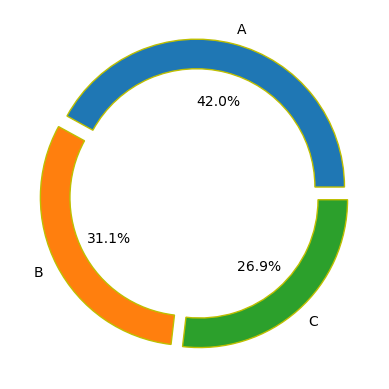

In [27]:
plt.pie(data['City_Category'].value_counts(), labels=['A', 'B', 'C'], autopct = '%1.1f%%', wedgeprops=dict(width=0.2, edgecolor='y'), explode=(0.05, 0.05, 0.05))
plt.show()

**Задание 11** (3 балла)

Создайте массив x длиной 100 со значениями элементов от 0 до 10.

In [28]:
import numpy as np

In [29]:
# np.linespace

In [30]:
x = np.linspace(0, 10, 100)
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

Создайте матрицу $Y_{100\times 100}$. Каждая строка = массив (длина = длина массива x) равномерно распределенных случайных величин ~$Uniform[0,1]$

In [31]:
# np.random.uniform(low=..., high=..., size=...)

In [32]:
Y = np.random.uniform(low=0, high=1, size=(x.shape[0], x.shape[0]))
Y

array([[9.10422100e-01, 4.61829379e-01, 3.30945284e-01, ...,
        5.75360053e-01, 7.51141944e-01, 8.02623198e-01],
       [3.92560902e-01, 3.35916980e-01, 3.63113327e-01, ...,
        9.69968262e-02, 2.60045826e-01, 6.33364210e-01],
       [9.66296065e-04, 1.96077433e-01, 8.53464227e-01, ...,
        9.08148098e-01, 8.19488409e-01, 4.82082741e-02],
       ...,
       [1.40391334e-01, 7.84134467e-02, 8.31371017e-01, ...,
        5.50545883e-01, 1.69977002e-01, 4.18104005e-01],
       [8.12207660e-02, 2.49623505e-01, 3.63837040e-01, ...,
        3.92507923e-01, 1.57210232e-01, 8.99768356e-01],
       [9.52939919e-01, 9.14300753e-01, 9.86842510e-01, ...,
        8.72233487e-01, 8.76688213e-01, 5.42183249e-01]])

1. Постройте график средних значений по столбцам матрицы $Y$.

2. Также постройте график доверительного интервала средних значений в каждой точке y (уровень доверия $\alpha$ = 0.05). $[\bar{y} - z_{\alpha}std(y); \ \bar{y} + z_{\alpha}std(y)]$

3. Закрасьте область между графиками доверительного интервала

In [33]:
import scipy.stats
from scipy.stats import norm

In [34]:
# scipy.stats.norm.interval, np.mean, np.std, plt.plot(..., color=...), plt.fill_between, plt.show

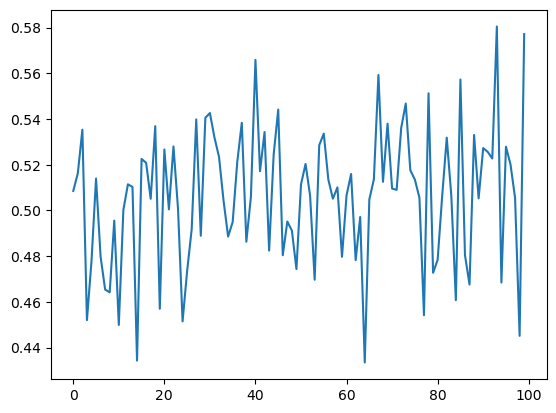

In [35]:
means = np.mean(Y, axis=0)
plt.plot(means)

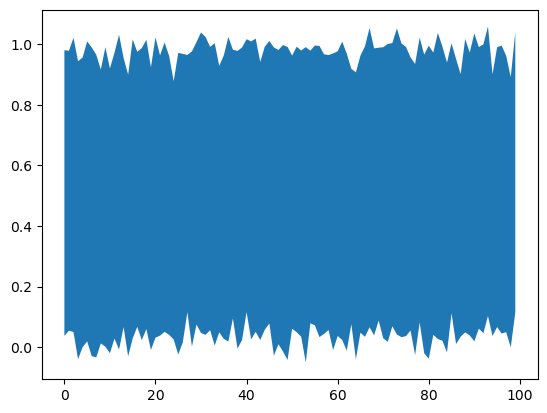

In [36]:
plt.fill_between(np.arange(100), means - norm.ppf(0.05) * np.std(Y, axis=0, ddof=1), \
                 means + norm.ppf(0.05) * np.std(Y, axis=0, ddof=1))

**Задание 12** (3 балла)

Постройте 3 графика рядом (сгенерируйте 1000 значений и постройте гистограмму распределения):

1. Нормальное распределение $N(0,1)$

2. Равномерное распределение $U(0,1)$

3. Экспоненциальное $Exp(1)$

Гистограммы должны быть нормированы. Все оси подписаны. Все графики имеют title.

In [37]:
# np.random, plt.subplots

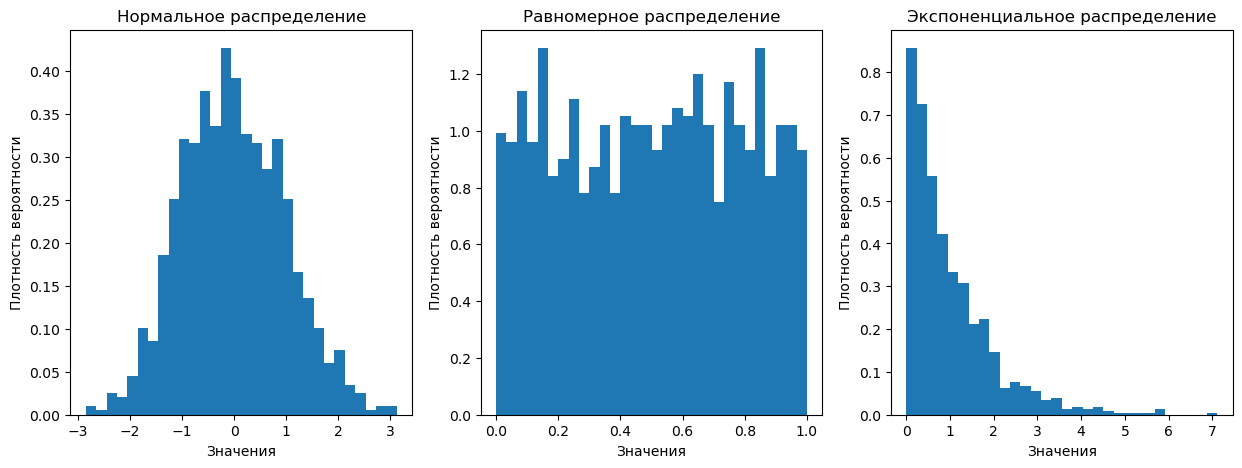

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.hist(np.random.randn(1000), bins=30, density=True)
ax1.set_title("Нормальное распределение")
ax1.set_xlabel("Значения")
ax1.set_ylabel("Плотность вероятности")

ax2.hist(np.random.rand(1000), bins=30, density=True)
ax2.set_title("Равномерное распределение")
ax2.set_xlabel("Значения")
ax2.set_ylabel("Плотность вероятности")

ax3.hist(np.random.exponential(scale=1, size=1000), bins=30, density=True)
ax3.set_title("Экспоненциальное распределение")
ax3.set_xlabel("Значения")
ax3.set_ylabel("Плотность вероятности")

plt.show()